## Context and Objective : 

We have the data for the laptop seller having different types of laptop with their prices and specification. Dataset contains total 1303 observations.  As  a  data scientist for a online publication  company  which focused on technology, our objective is  to find the insight  from the data provided  ,  and help user or subscriber of the company to get  informative visuals regarding laptop configuration and prices to improve customer experience also  predict the  laptop price with  given specification by the User.

## Data Dictionary :
- Company: Laptop Manufacturer
- Product: Brand and Model
- TypeName: Type (Notebook, Ultrabook, Gaming, etc.)
- Inches: Screen Size
- ScreenResolution: Screen Resolution
- Cpu: Central Processing Unit
- Ram: Laptop RAM
- Memory: Hard Disk / SSD Memory
- GPU: Graphics Processing Unit
- OpSys: Operating System
- Weight: Laptop Weight
- Price_euros: Price in euros

In [2]:
#importing the basic library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes=True
%matplotlib inline


In [3]:
#import data for analysis
ldata=pd.read_csv("laptop_price.csv")
np.random.seed(1)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)
ldata.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
644,652,Acer,Extensa EX2540,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,450.00
1275,1293,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
163,167,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1079.00
1008,1022,HP,ProBook 440,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64kg,1049.26
909,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.00


In [4]:
# checking the information about the data frame

ldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
#checking the missing vales for  the data frame
ldata.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
#checking the duplicate values for the col in data frame
ldata.duplicated().sum()

0

In [7]:
#description for the data frame

ldata.describe(include='all')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Lenovo,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [8]:
#geneating the  unique value counts  for the categorical varibles with seperating cat and num columns
cat_col=[]
num_col=[]
for i in ldata.columns:
    cat_col.append(i)
    if ldata[i].dtypes=="object":
        print(f'unique value counts for colums {i}  :\n{ldata[i].value_counts()}')
        
    else :
        num_col.append(i)
        print(f'{i} :numerical colum')







laptop_ID :numerical colum
unique value counts for colums Company  :
Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: Company, dtype: int64
unique value counts for colums Product  :
XPS 13                                      30
Inspiron 3567                               29
250 G6                                      21
Legion Y520-15IKBN                          19
Vostro 3568                                 19
                                            ..
17-BS037cl (i3-6006U/8GB/1TB/W10)            1
C740-C9QX (3205U/2GB/32GB/Chrome             1
GE72VR 6RF                                   1
X550VX-XX015D (i5-6300HQ/4GB/1TB/GeForce     1
Portege Z30-C-16J                            1
Name: Product, Length

In [9]:
#formating some of the col  in the dataframe 
ldata['Product_model']=ldata['Product'].str.split(' ').str[0]
ldata['TypeName']=ldata['TypeName'].str.replace("2 in 1 Convertible","2IN1_Convert")
ldata['Screen_Pc1']=ldata['ScreenResolution'].str.split(" ").str[-1].str.split("x",expand=True)[0]
ldata['Screen_Pc2']=ldata['ScreenResolution'].str.split(" ").str[-1].str.split("x",expand=True)[1]
temp1=ldata['ScreenResolution'].str.split("1").str[0]
temp2=temp1.str.split("2").str[0]
temp3=temp2.str.split("3").str[0]
ldata['Screen_Display']=temp3.str.split("/").str[0].str.replace(" ","_")
ldata['Screen_Display'].value_counts()
ldata['Screen_Display'].replace("",'No Data',inplace=True)

In [10]:
ldata['Cpu_Speed']=ldata['Cpu'].str.split(" ").str[-1].str.replace("GHz","").astype(float)
temp1=ldata['Cpu'].str.split("1").str[0]
temp2=temp1.str.split("2").str[0]
#rint(temp2.value_counts())
temp3=temp2.str.split("3").str[0]
#rint(temp3.value_counts())
temp4=temp3.str.split(" ").str[1]+"_"+temp3.str.split(" ").str[2]
temp4[temp4.isna()]
temp1=ldata['Cpu'].str.split("1").str[0]
temp2=temp1.str.split("2").str[0]
print(temp2.count())
temp3=temp2.str.split("3").str[0]
print(temp3.count())


ldata['Cpu_Org']=temp3.str.split(" ").str[0]
ldata['Cpu_Series']=temp3.str.split(" ").str[1]+"_"+temp3.str.split(" ").str[2]
ldata['Cpu_Series'].fillna('No_data',inplace=True)
ldata['Ram']=ldata['Ram'].str.split("GB").str[0].astype(int)
ldata['Added_Memory']=ldata['Memory'].str.split(" + ").str[-1].str.split("Flash Storage").str[-1]
ldata['Added_Memory'].replace('',np.nan,regex=True,inplace=True)
ldata['Memory_size']=ldata['Memory'].str.split(" ").str[0]


1303
1303


In [11]:
 #fundtion to convert the TB to GB 
def Storage_to_num(income_val):
  
    if isinstance(income_val, str):  # checks if `income_val` is a string
        multiplier = 1  # handles K vs M salaries
        if income_val.endswith('GB'):
            multiplier = 1
        elif income_val.endswith('TB'):
            multiplier = 1000
        return float(income_val.replace('GB', '').replace('TB', '')) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

             

In [12]:
ldata["Memory_size"].value_counts()

256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
16GB      10
1.0TB     10
180GB      5
240GB      1
508GB      1
8GB        1
Name: Memory_size, dtype: int64

In [13]:
ldata['Memory_size']=ldata['Memory_size'].apply(Storage_to_num)
ldata['Added_Memory']=ldata['Added_Memory'].str.split(" ").str[0]
ldata['Added_Memory']=ldata['Added_Memory'].apply(Storage_to_num)
#gpu mode and compay 
ldata['Gpu_model']=ldata['Gpu'].str.split(" ").str[1]+'_'+ldata['Gpu'].str.split(" ").str[2]

In [14]:
ldata.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Product_model,Screen_Pc1,Screen_Pc2,Screen_Display,Cpu_Speed,Cpu_Org,Cpu_Series,Added_Memory,Memory_size,Gpu_model
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,MacBook,2560,1600,IPS_Panel_Retina_Display_,2.3,Intel,Core_i5,128.0,128.0,Iris_Plus
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Macbook,1440,900,No Data,1.8,Intel,Core_i5,NaN,128.0,HD_Graphics
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,250,1920,1080,Full_HD_,2.5,Intel,Core_i5,256.0,256.0,HD_Graphics
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,MacBook,2880,1800,IPS_Panel_Retina_Display_,2.7,Intel,Core_i7,512.0,512.0,Radeon_Pro
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,MacBook,2560,1600,IPS_Panel_Retina_Display_,3.1,Intel,Core_i5,256.0,256.0,Iris_Plus


In [15]:
#checking the weight coloumn for data frame
def wgt_convert(value):
    if isinstance(value,str):
        if value.endswith("kg"):
            return(float(value.replace("kg","")))
        else :
            return np.nan

In [16]:
ldata["Weight"]=ldata["Weight"].apply(wgt_convert)
#dropping the unnesesory columns
ldata_bkp=ldata
ldata.drop(['laptop_ID', 'Product','ScreenResolution', 'Cpu',  'Memory', 'Gpu'],axis=1,inplace=True)
ldata['Screen_Pc1']=ldata['Screen_Pc1'].astype(int)
ldata['Screen_Pc2']=ldata['Screen_Pc2'].astype(int)
ldata['Added_Memory'].fillna(0,inplace=True,axis=0)
ldata['Gpu_model'].fillna('no data',inplace=True,axis=0)
ldata.drop_duplicates(inplace=True,keep='first')
ldata[['Ram','Added_Memory','Memory_size']]=ldata[['Ram','Added_Memory','Memory_size']].astype(int)

# EDA

In [17]:
#plotting the distibution  for the numerical datatypes
cat_col=[]
num_col=[]

for col in ldata.columns:
    if ldata[col].dtypes=="object":
        cat_col.append(col)
    else:
        num_col.append(col)

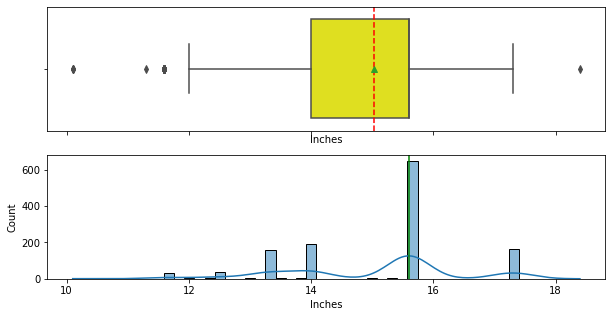

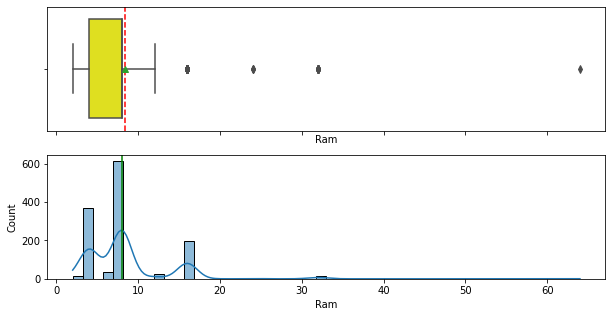

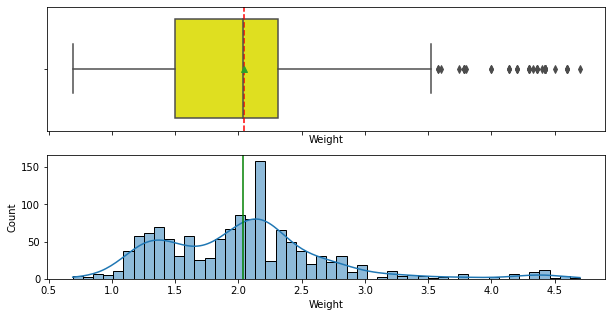

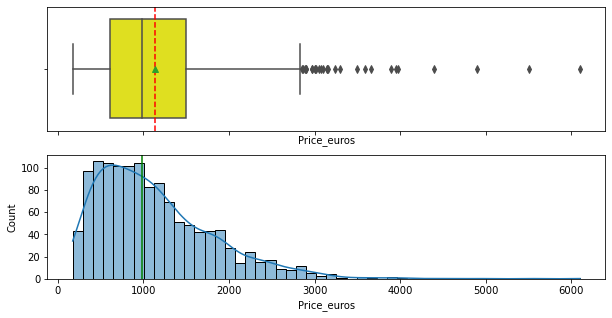

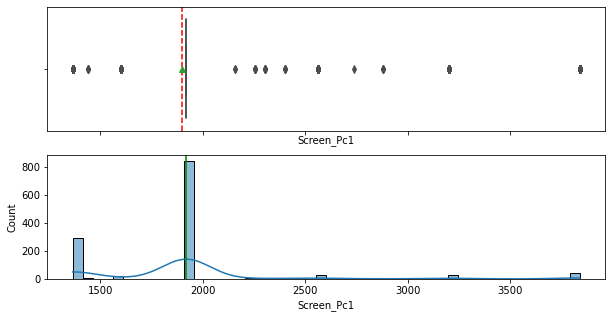

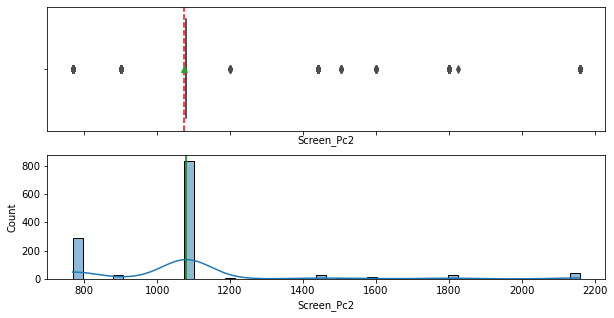

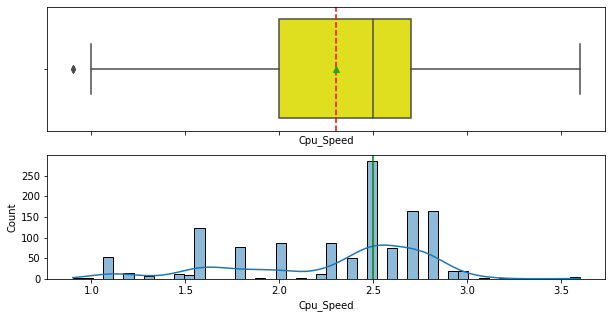

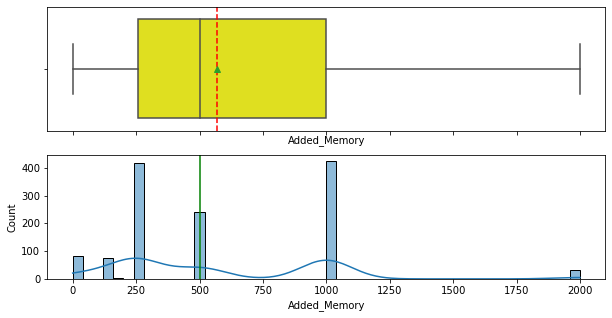

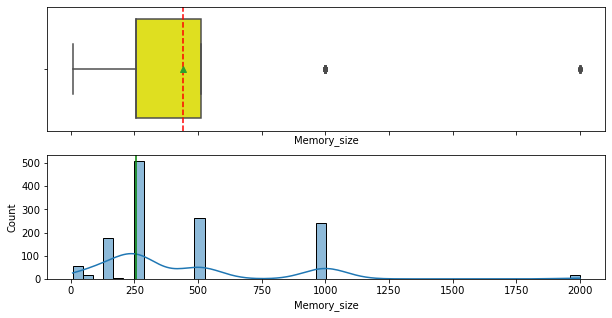

In [18]:
for col in num_col:
    bins=50
    f2, (ax1, ax2) = plt.subplots(
        nrows=2, 
        sharex=True, 
        figsize=(10,5),
    )  
    sns.boxplot(
        data=ldata, x=col, ax=ax1, showmeans=True, color="yellow"
    ) 
    sns.histplot(
        data=ldata, x=col, kde=True, ax=ax2, bins=bins, palette="blue"
    ) 
    ax1.axvline(
        ldata[col].mean(), color="red", linestyle="--"
    )  
    ax2.axvline(
        ldata[col].median(), color="green", linestyle="-"
    )  
 
    

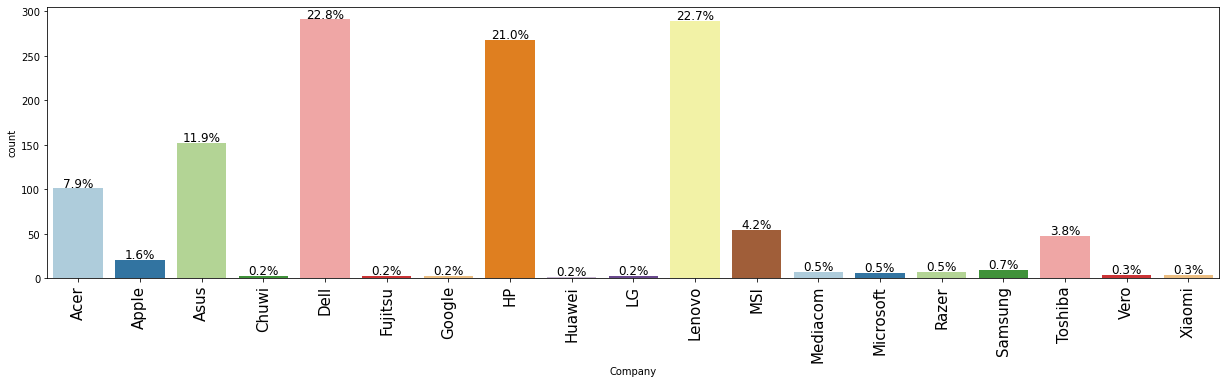

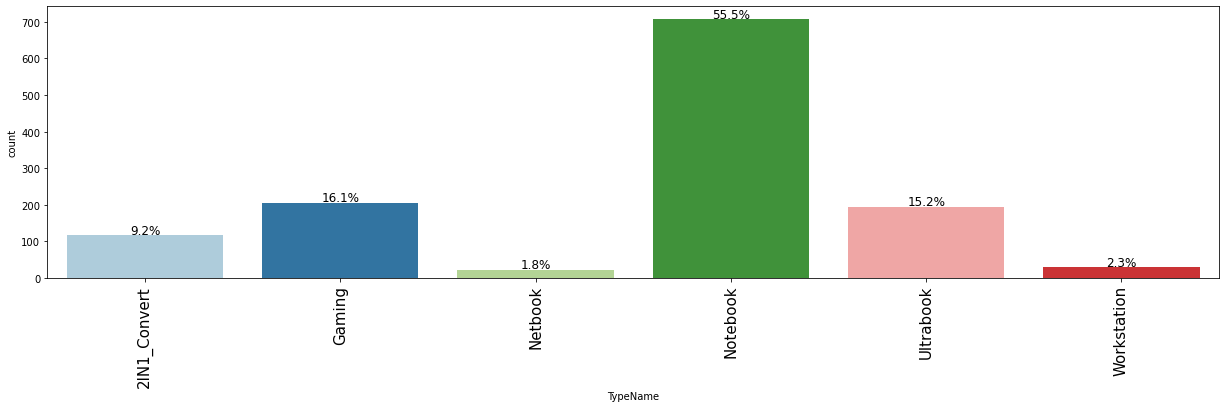

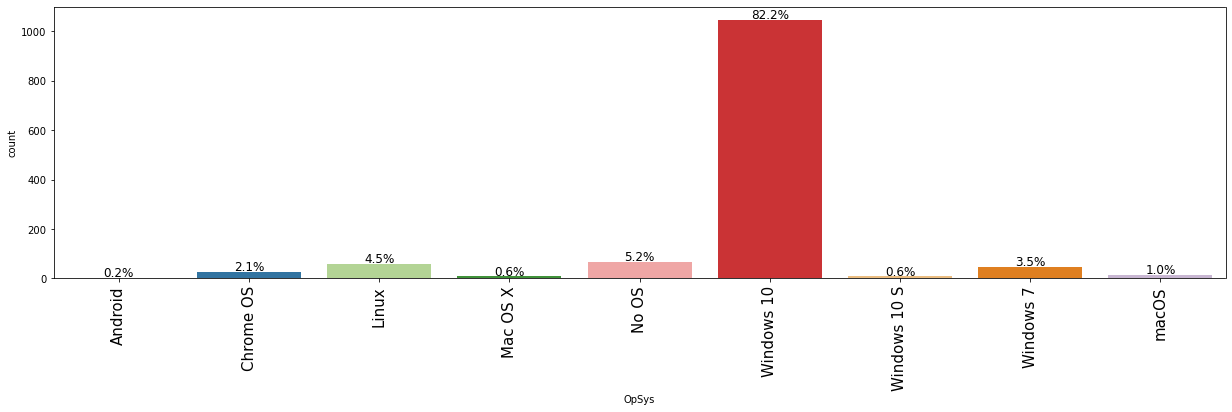

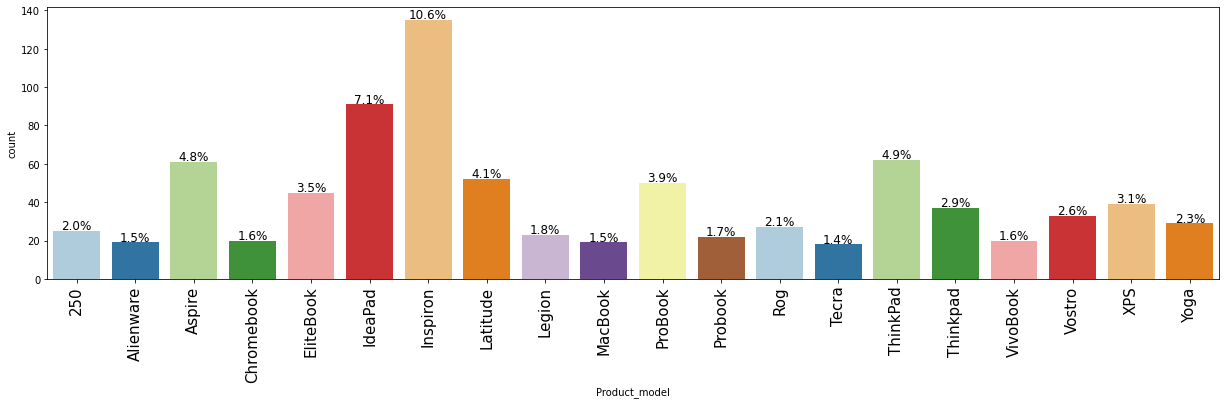

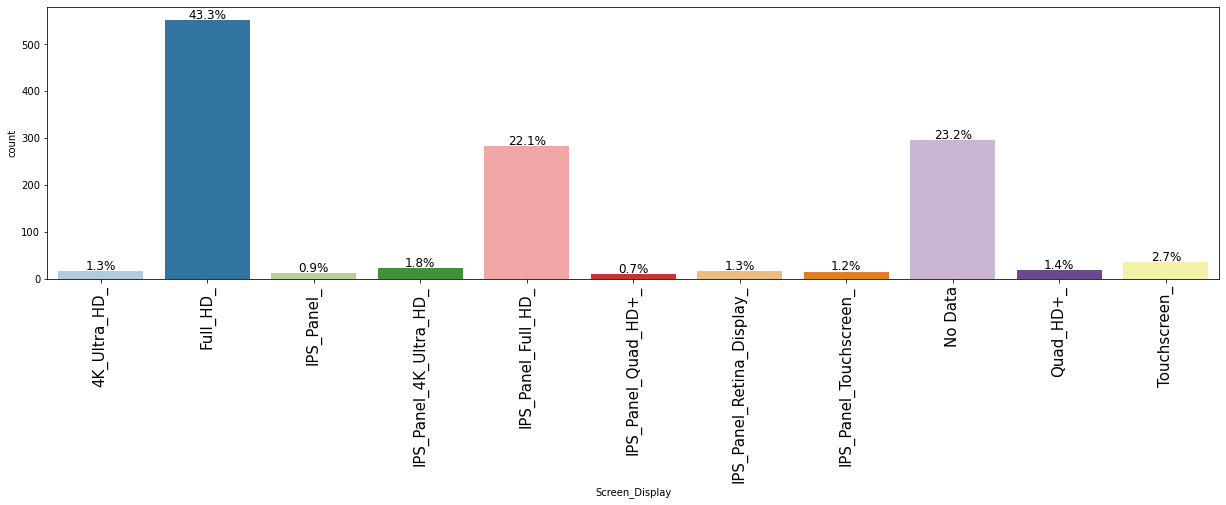

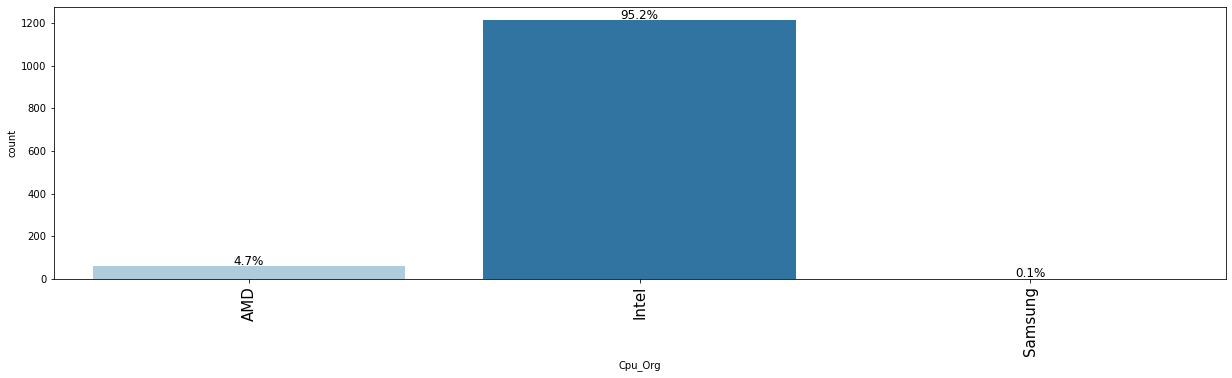

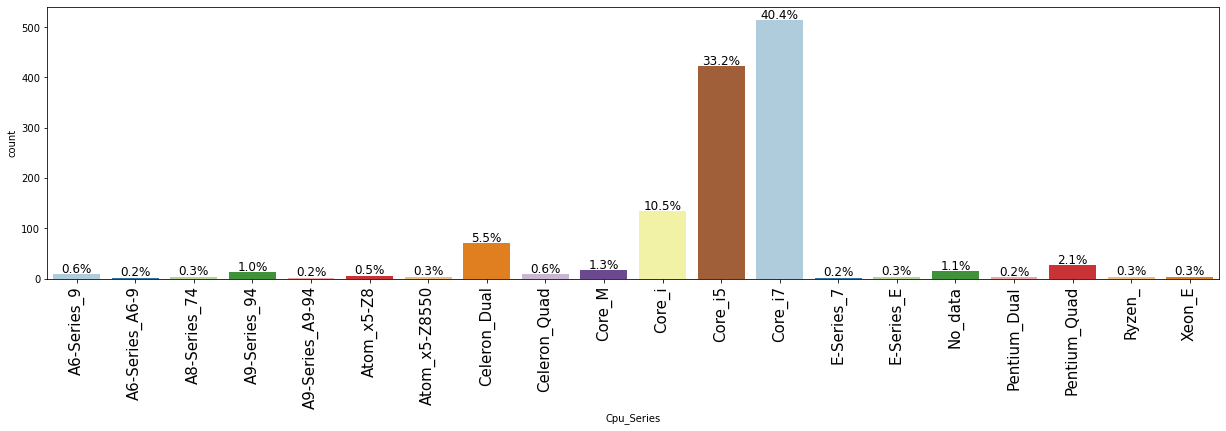

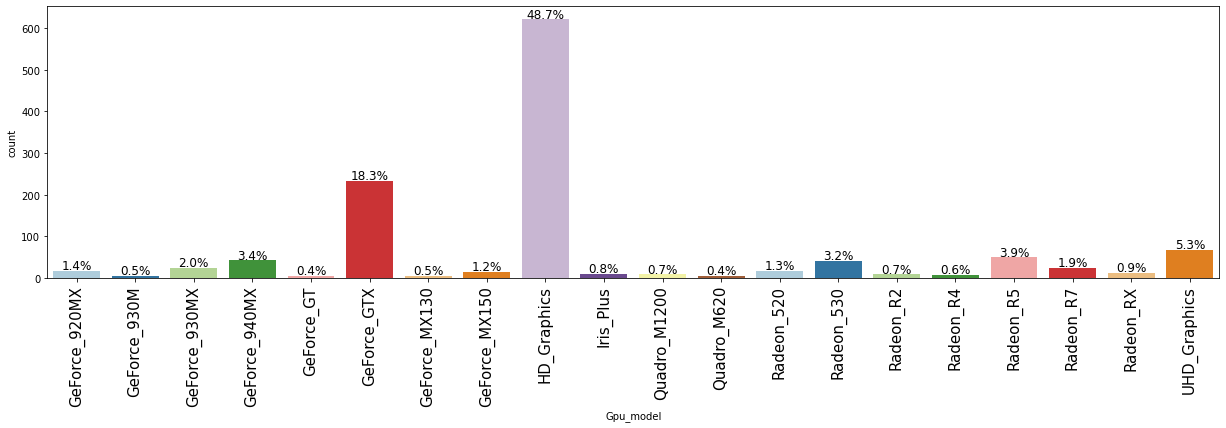

In [19]:
for col in cat_col:
    n=20
    perc=True
    total = len(ldata[col])  # length of the column
    count = ldata[col].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=ldata,
        x=col,
        palette="Paired",
        order=ldata[col].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:

def st_plot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

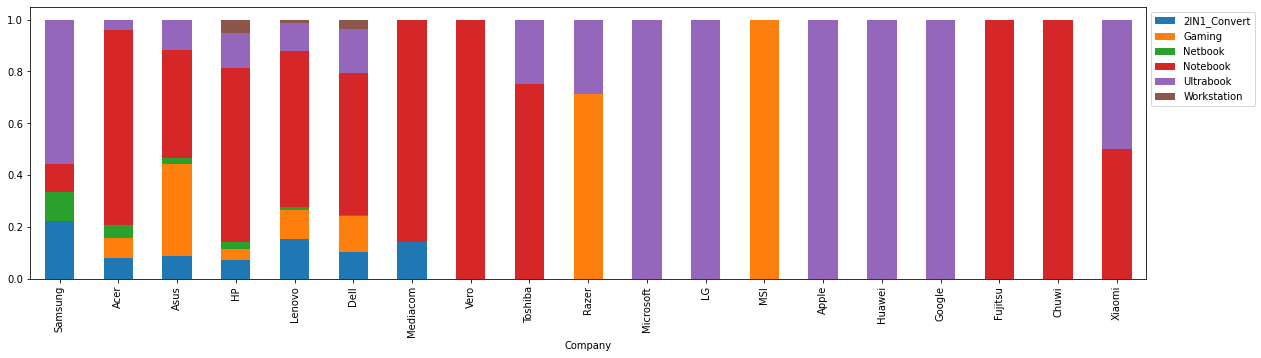

In [21]:
st_plot(ldata, "Company", "TypeName")

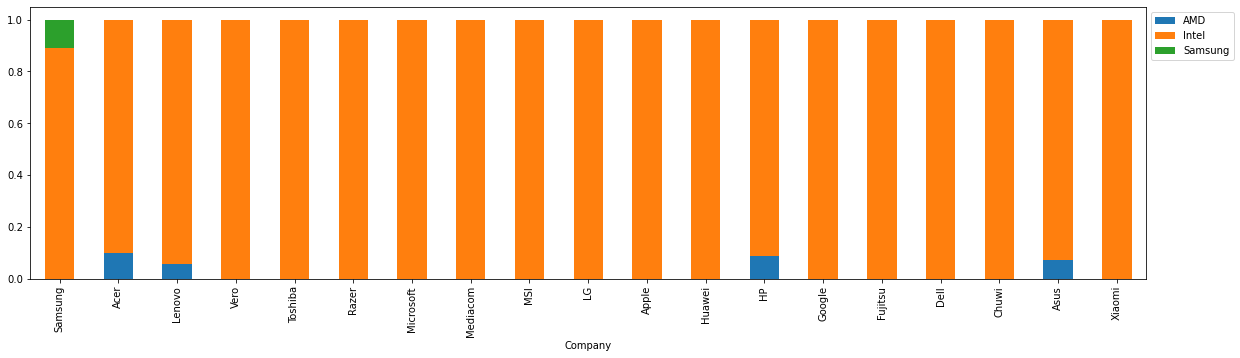

In [22]:
st_plot(ldata, "Company", "Cpu_Org")

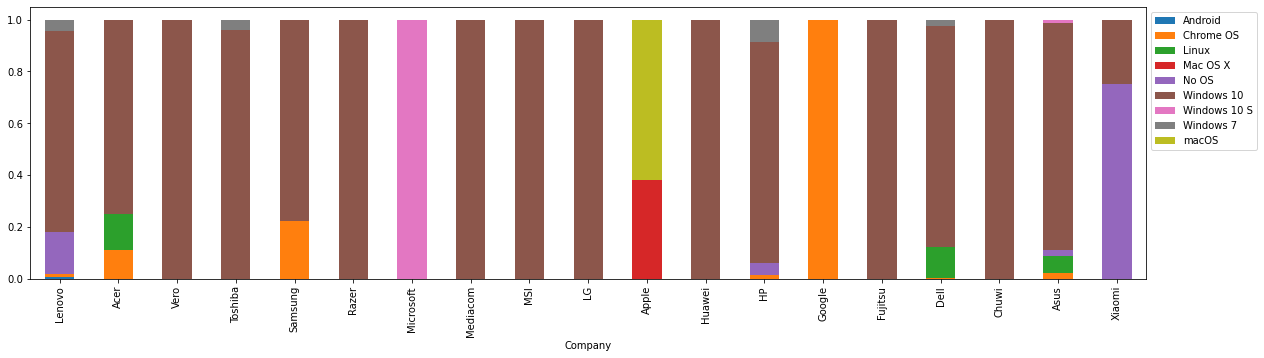

In [23]:
st_plot(ldata, "Company", "OpSys")

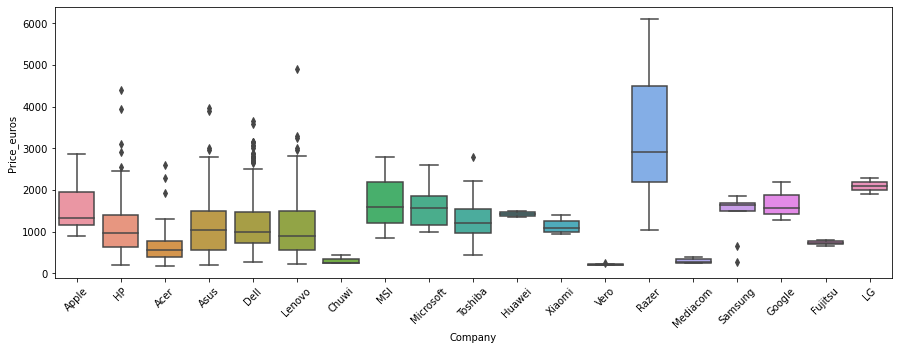

In [24]:
plt.figure(figsize=(15, 5))


sns.boxplot(data=ldata, y="Price_euros", x="Company")
plt.xticks(rotation=45)


plt.show()

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


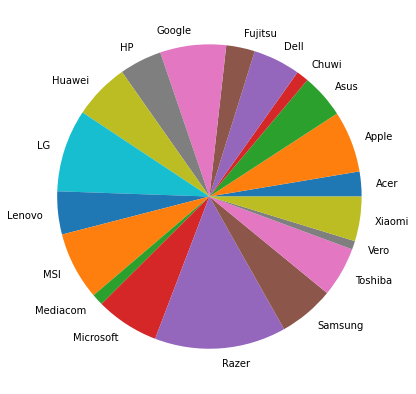

In [25]:
pi_data=ldata.groupby("Company")["Price_euros"].mean()
print(pi_data)
labels=["Acer"          ,
"Apple"       ,
"Asus"         ,
"Chuwi"         ,
"Dell"         ,
"Fujitsu"       ,
"Google"       ,
"HP"          ,
"Huawei"       ,
"LG"           ,
"Lenovo"       ,
"MSI"          ,
"Mediacom"     ,
"Microsoft"    ,
"Razer"        ,
"Samsung"      ,
"Toshiba"     ,
"Vero"          ,
"Xiaomi"       ]
fig = plt.figure(figsize =(10, 7))
plt.pie(pi_data, labels = labels)
 
# show plot
plt.show()

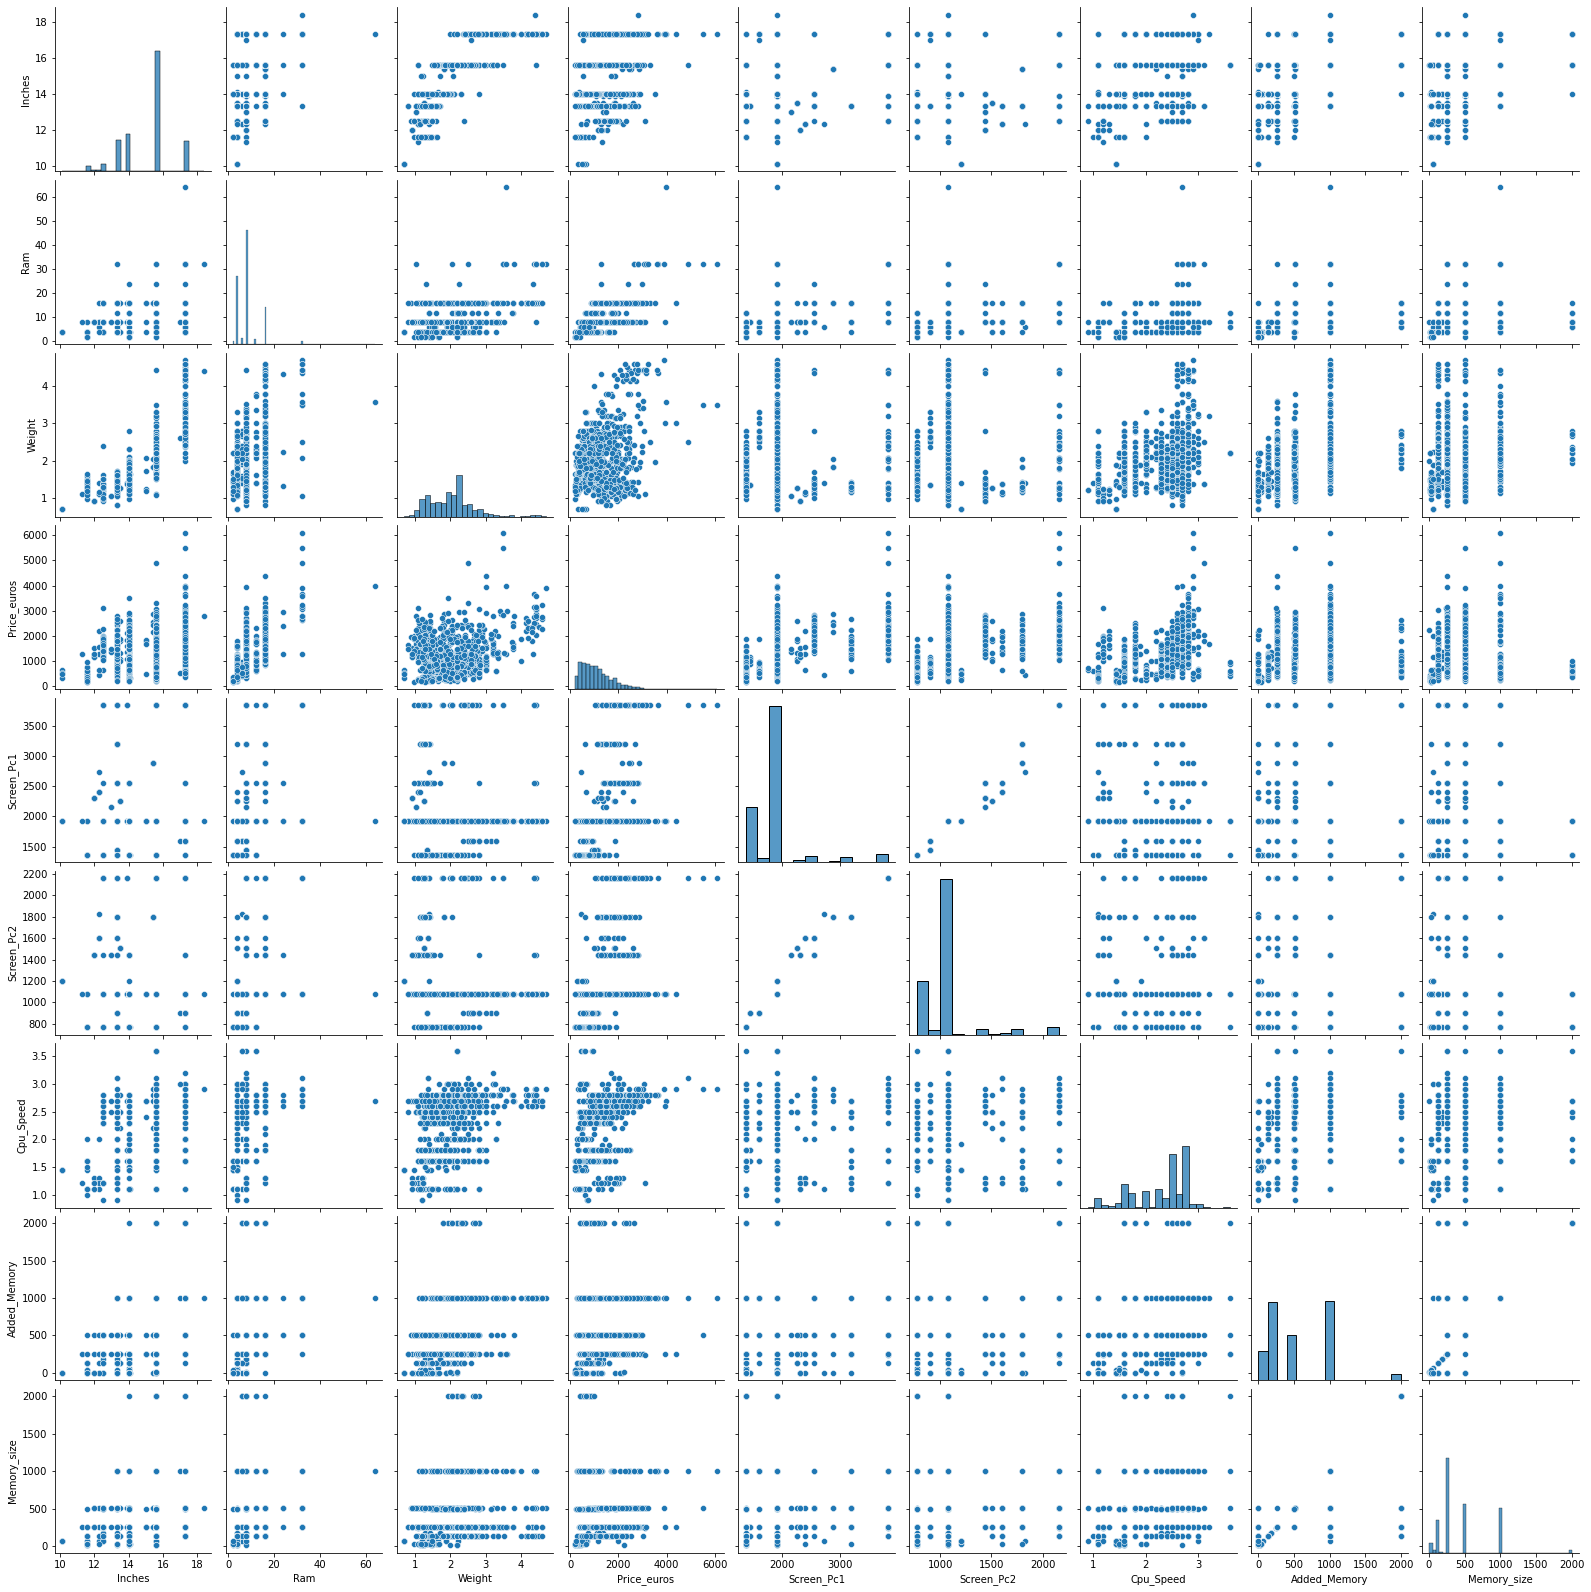

In [26]:
sns.pairplot(ldata)

<AxesSubplot:>

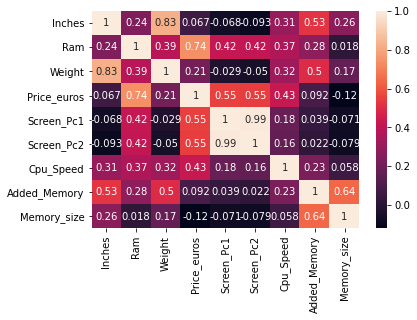

In [27]:
corr=ldata.corr()
sns.heatmap(corr,annot=True)

In [28]:


from sklearn.linear_model import LinearRegression,Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor
,BaggingRegressor
,AdaBoostRegressor)
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn import svm
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [29]:

X=ldata.drop(['Price_euros'],axis=1)
y=ldata['Price_euros']

In [30]:
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline,make_pipeline
std=StandardScaler(with_mean=True)
onehot=OneHotEncoder()
X[['Inches','Ram','Weight','Screen_Pc1','Screen_Pc2','Cpu_Speed','Added_Memory','Memory_size']]=std.fit_transform(X[['Inches','Ram','Weight','Screen_Pc1','Screen_Pc2','Cpu_Speed','Added_Memory','Memory_size']])
enc_df = pd.DataFrame(onehot.fit_transform(X[['Company', 'TypeName', 'OpSys', 'Product_model', 'Screen_Display', 'Cpu_Org', 'Cpu_Series', 'Gpu_model']]).toarray())

In [31]:
X.drop(['Company', 'TypeName', 'OpSys', 'Product_model', 'Screen_Display', 'Cpu_Org', 'Cpu_Series', 'Gpu_model'] ,axis=1,inplace=True)

In [32]:
X=X.join(enc_df)

In [33]:
y=np.log(y)

In [34]:
# then we split the temporary set into train and validation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(714, 363) (306, 363) (255, 363)
(714,) (306,) (255,)


In [35]:
#building and testing multipe models
model_tr=[]
model_tr.append(("Linear_Regression",LinearRegression()))
model_tr.append(("ridge",Ridge()))
model_tr.append(("DecisionTreeRegressor",DecisionTreeRegressor(random_state=1)))
model_tr.append(("RandomForestRegressor",RandomForestRegressor(random_state=1)))
model_tr.append(("BaggingRegressor",BaggingRegressor(random_state=1)))
model_tr.append(("AdaBoostRegressor",AdaBoostRegressor(random_state=1)))
model_tr.append(("XGBRegressor",XGBRegressor(random_state=1)))


In [36]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


In [95]:

df=[]
result=pd.DataFrame()
def run_defult_algo(XT,yT,Xv,yV):
    for name,ml  in model_tr:
        dt=ml
        dt.fit(XT,yT)
        predict=dt.predict(Xv)
        #temp=r2_score(y_val,predict)
        r2 = r2_score(yV, predict)  # to compute R-squared
        adjr2 = adj_r2_score(Xv,yV, predict) # to compute adjusted R-squared
        rmse = np.sqrt(mean_squared_error(yV, predict))  # to compute RMSE
        mae = mean_absolute_error(yV, predict)  # to compute MAE
        mape = mape_score(yV, predict)  # to compute MAPE
        # creating a dataframe of metrics
        print(f' Model_Name: {name}():\n rmse: {rmse}\n mae: {mae}\n R2: {r2}\n adjr2: {adjr2}\n mape: {mape}\n ' )
        print('*'*50)
              

In [97]:
run_defult_algo(X_train,y_train,X_val,y_val)


 Model_Name: Linear_Regression():
 rmse: 6962028528.463956
 mae: 1193085459.8396616
 R2: -1.212492327167468e+20
 adjr2: 6.376037237690996e+20
 mape: 18659782308.352425
 
**************************************************
 Model_Name: ridge():
 rmse: 0.21301092812113745
 mae: 0.16320320028874916
 R2: 0.8864959988506008
 adjr2: 1.596874488802875
 mape: 2.3999958921600633
 
**************************************************
 Model_Name: DecisionTreeRegressor():
 rmse: 0.27326367406263863
 mae: 0.21089037570933508
 R2: 0.8132024360597543
 adjr2: 1.982297534513361
 mape: 3.0849037928927596
 
**************************************************
 Model_Name: RandomForestRegressor():
 rmse: 0.2205444288342415
 mae: 0.16310210123980057
 R2: 0.8783254958794326
 adjr2: 1.639840064771949
 mape: 2.382193764047712
 
**************************************************
 Model_Name: BaggingRegressor():
 rmse: 0.23388736293146092
 mae: 0.17764601259920204
 R2: 0.8631575262790261
 adjr2: 1.7196026635327075


In [98]:
from sklearn.model_selection import validation_curve, learning_curve
from mlxtend.plotting import plot_learning_curves

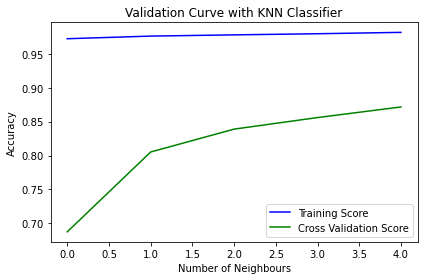

In [99]:
estimator=RandomForestRegressor()
                                            
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,  X=X_train, y=y_train, cv=5,return_times=True)
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_scores, axis = 1)
std_train_score = np.std(train_scores, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_scores, axis = 1)
std_test_score = np.std(test_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot( mean_train_score,
     label = "Training Score", color = 'b')
plt.plot( mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb={'n_estimators':[50,100,150],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}
param_grid_reand={'n_estimators':[50,100,150,200],'max_depth':[1,2,3,4,5]}
scorer = "r2"
GridSearchCV = GridSearchCV(XGBRegressor(), param_grid=param_grid_xgb, scoring='r2', cv=10, n_jobs = -1)
fninal_modle=GridSearchCV.fit(X_train,y_train)
   
print("Best parameters are {} with CV score={}:" .format(GridSearchCV.best_params_,GridSearchCV.best_score_,))



Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'reg_lambda': 10} with CV score=0.8945268092152265:


In [104]:
# define the pipeline
fmodel=XGBRegressor(gamma=0, learning_rate= 0.2, max_depth= 3, n_estimators= 150, reg_lambda= 10)

predict=fninal_modle.predict(X_test)
r2_score(y_test,predict)

0.9061369001965557

In [105]:
lt=ldata.drop('Price_euros',axis=1)

<AxesSubplot:xlabel='value', ylabel='col_name'>

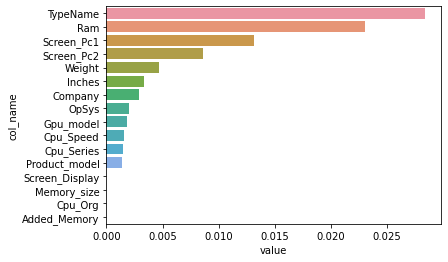

In [106]:
temp=pd.DataFrame((sorted(zip(GridSearchCV.best_estimator_.feature_importances_,lt.columns),reverse=True)),columns=("value","col_name")).reindex()
sns.barplot(data=temp,y='col_name',x="value")

# Conclusion  :
 
 We have performed the below steps to get hand on regression problem :

1) Importing base packages.
2) Data cleaning and summarization.
3) Missing value treatment.
4) Feature engineering and text Columns formatting.
6) Testing multiple regression models and choosing best one.
7) Hyper tuning for the model.
8) Predicting test scores with different matrices.
9) Printing the important features for the prediction as per best model.

- As per our analysis  XGBRegressor with hyper paramters  (gamma=0, learning_rate= 0.2, max_depth= 3, n_estimators= 150, reg_lambda= 10) gives the best  among all regression model.

- Thre is still scope for the further frature enginnering and modle optimization  to reach maximun scores.

